<a href="https://colab.research.google.com/github/SushRed10/22MCB0005/blob/main/Data_Analytics_DA_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import statistics as st
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Dataset Source = https://archive.ics.uci.edu/ml/datasets/Computer+Hardware

# Perform Cleaning, Feature Selection, Feature Elimination, Root node Selection, Model Building and Visualization 
# ( Precision, Recall, F1 Score,Accuracy, TPR, FPR, RoC curve )

data_names = ['Vendor_Name','Model_Name','MYCT','MMIN','MMAX','CACHE','CHMIN','CHMAX','PRP','ERP']

# MYCT: machine cycle time in nanoseconds (integer)
# MMIN: minimum main memory in kilobytes (integer)
# MMAX: maximum main memory in kilobytes (integer)
# CACH: cache memory in kilobytes (integer)
# CHMIN: minimum channels in units (integer)
# CHMAX: maximum channels in units (integer)
# PRP: published relative performance (integer)
# ERP: estimated relative performance from the original article (integer)

data2 = pd.read_csv('/content/drive/MyDrive/Data Analytics Assessment/machine.data', names = data_names)

data2

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACHE,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [ ]:
data2.Vendor_Name.unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor_Name  209 non-null    object
 1   Model_Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACHE        209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [ ]:
data2.isnull().sum()

Vendor_Name    0
Model_Name     0
MYCT           0
MMIN           0
MMAX           0
CACHE          0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [ ]:
data2.head(10)

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACHE,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


<Figure size 640x480 with 0 Axes>

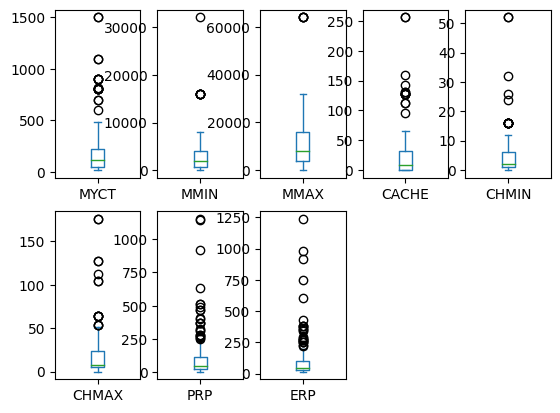

<Figure size 640x480 with 0 Axes>

In [ ]:
data2.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.figure()

<Figure size 640x480 with 0 Axes>

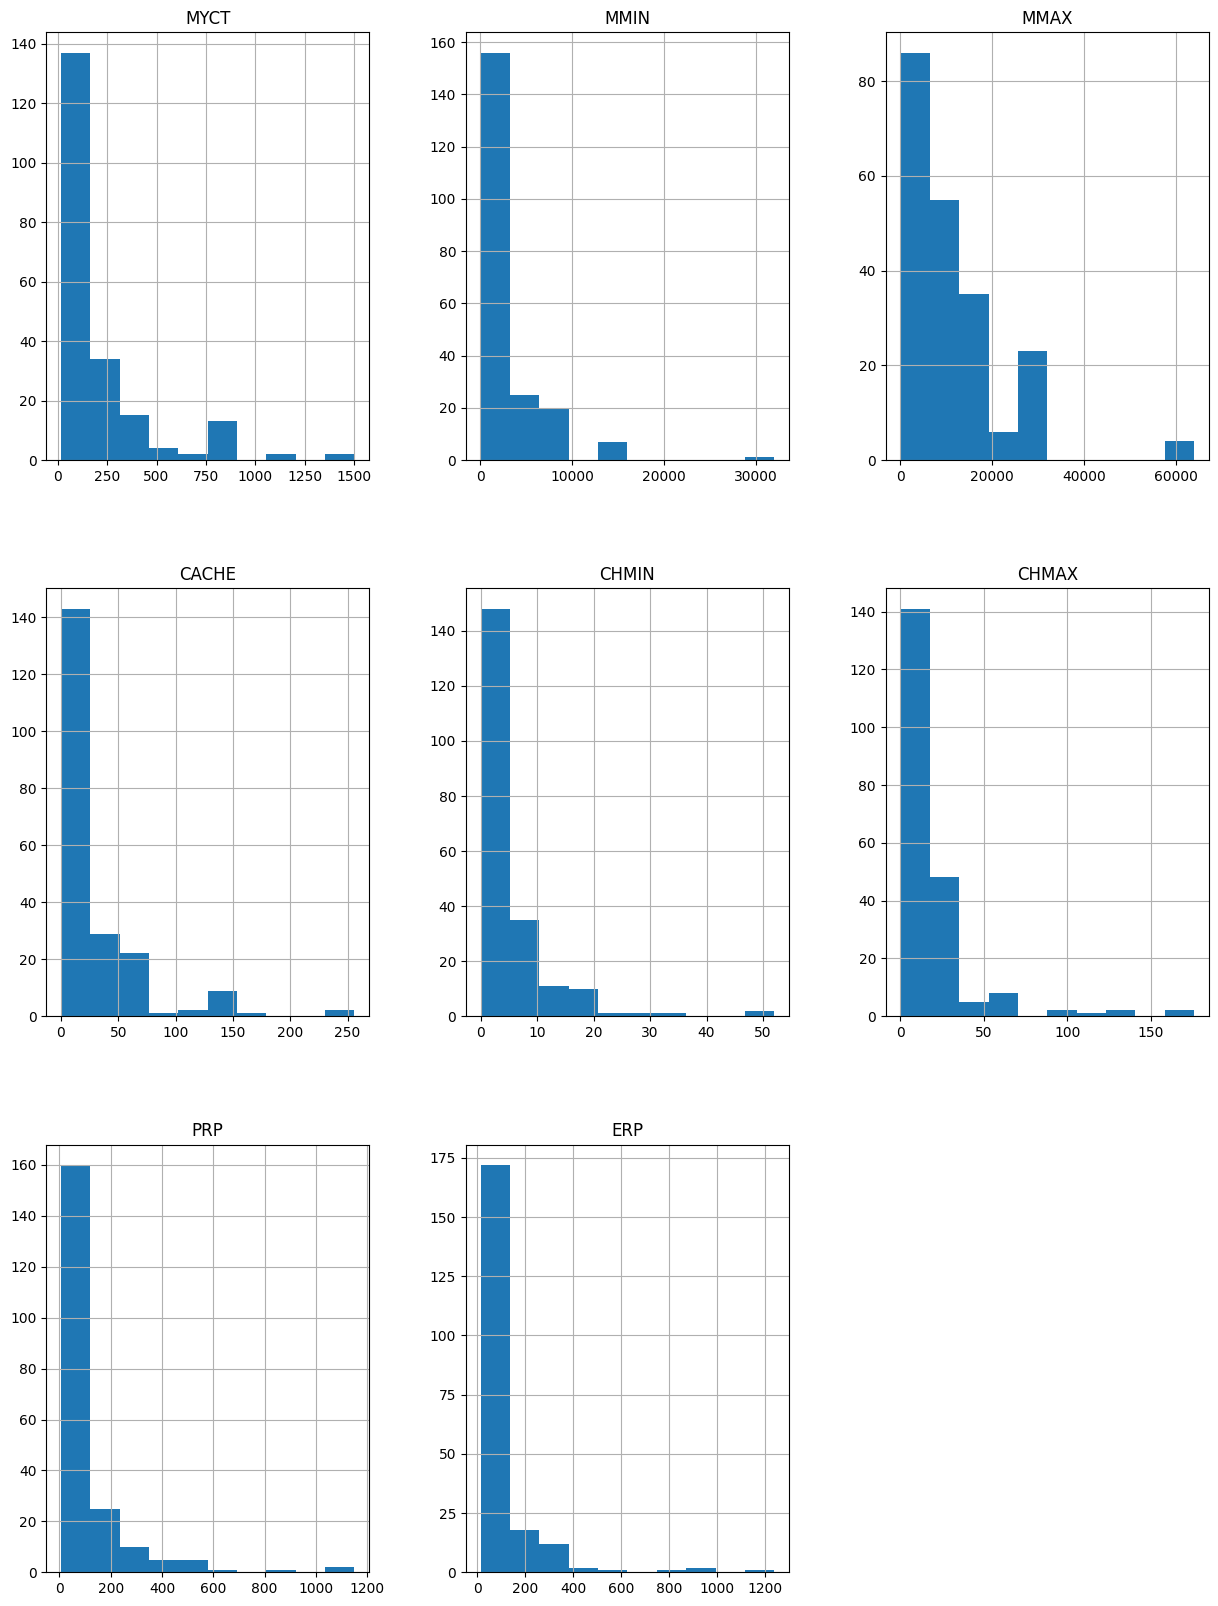

<Figure size 640x480 with 0 Axes>

In [ ]:
data2.hist(figsize=(15,20))
plt.figure()

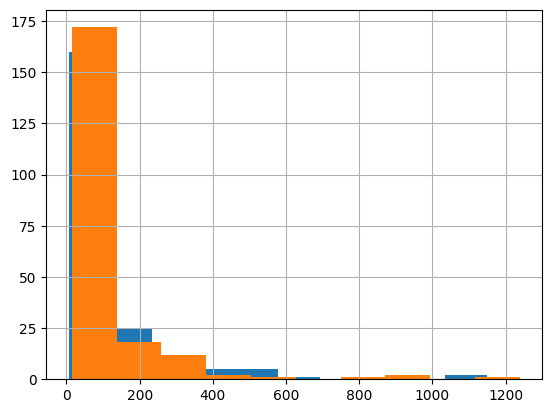

In [ ]:
data2['PRP'].hist();
data2['ERP'].hist();

<Figure size 640x480 with 0 Axes>

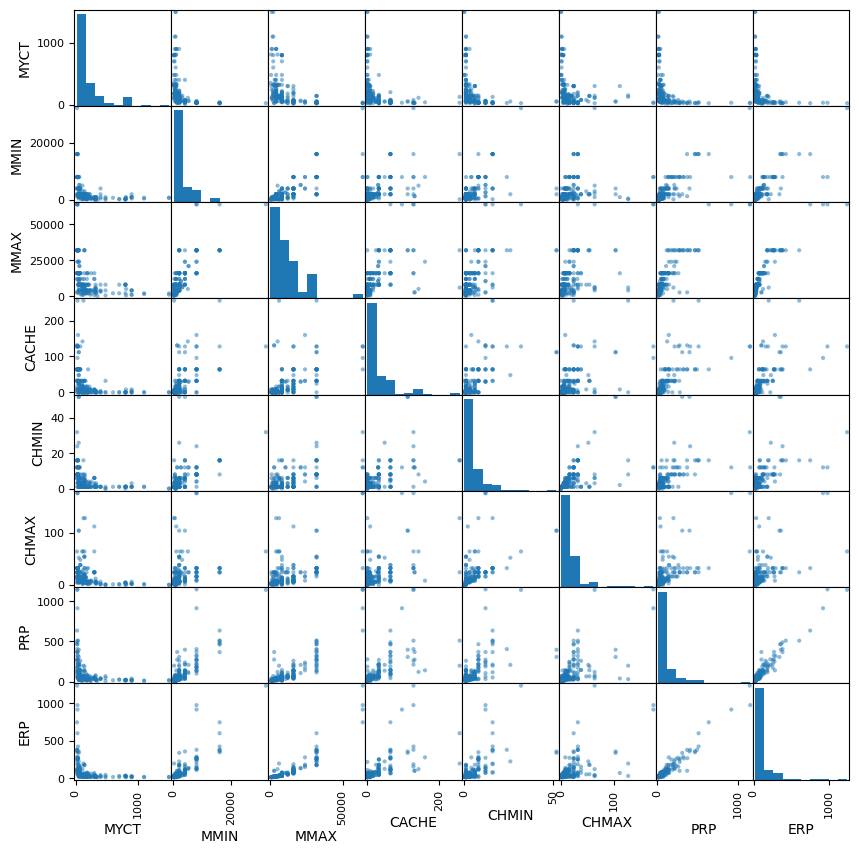

<Figure size 640x480 with 0 Axes>

In [ ]:
# scatter plot matrix
pd.plotting.scatter_matrix(data2,figsize=(10,10))
plt.figure()

#From the SPLOM matrix we can find out correlation between PRP vs ERP

In [ ]:
#To Check Correlation all data should be nominal converting categorical to numerical and showing relation

from sklearn import preprocessing

df=data2
vendor = preprocessing.LabelEncoder()
vendor.fit(df.Vendor_Name.unique())
df['Vendor_Name']=vendor.transform(df['Vendor_Name'])

model=preprocessing.LabelEncoder()
model.fit(df.Model_Name.unique())
df['Model_Name']=model.transform(df['Model_Name'])

df.corr()

,Vendor_Name,Model_Name,MYCT,MMIN,MMAX,CACHE,CHMIN,CHMAX,PRP,ERP
Vendor_Name,1.000000,-0.127345,-0.080296,-0.083438,0.008180,0.005729,0.037202,-0.012555,-0.021662,-0.020321
Model_Name,-0.127345,1.000000,0.048600,-0.126972,-0.176645,-0.035492,-0.218127,-0.154152,-0.192771,-0.181206
MYCT,-0.080296,0.048600,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.083438,-0.126972,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,0.008180,-0.176645,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACHE,0.005729,-0.035492,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,0.037202,-0.218127,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.012555,-0.154152,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.021662,-0.192771,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.020321,-0.181206,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor

Model_Compare= [[]] #Preparing List

#Feature Extraction as Vendor_Name and Model_Name don't have strong correaltion with ERP

feature_list = ['MYCT','MMIN','MMAX','CACHE','CHMIN','CHMAX','PRP']

values = data2[feature_list]
#Preparing Training and Testing Data, In the ratio of 80:20

X_feature = data2[feature_list]
Y_label = data2.ERP

X_feature_PRP = np.array(data2['PRP']).reshape(-1, 1)
Y_feature_ERP = np.array(data2['ERP']).reshape(-1, 1)

In [ ]:
# Perform ANOVA analysis
f_values, p_values = f_regression(X_feature, Y_label)
anova_results = pd.DataFrame({'Feature': X_feature.columns, 'F-value': f_values, 'p-value': p_values})
print("ANOVA Results:")
print(anova_results)

ANOVA Results:
  Feature      F-value        p-value
0    MYCT    18.778451   2.289537e-05
1    MMIN   422.636024   6.701013e-52
2    MMAX   895.035239   4.205592e-77
3   CACHE   150.332889   2.446245e-26
4   CHMIN   123.042584   9.664887e-23
5   CHMAX   111.779441   3.621692e-21
6     PRP  2932.572973  3.427048e-124


In [ ]:
# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=1)
rfe.fit(X_feature, Y_label)
selected_features = X_feature.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['PRP'], dtype='object')


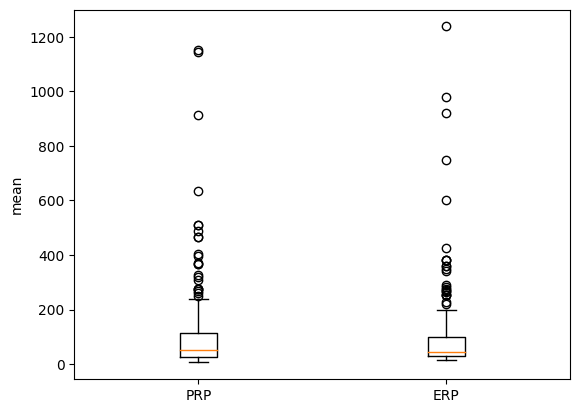

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([data2['PRP'], data2['ERP']])
ax.set_xticklabels(["PRP", "ERP"])
ax.set_ylabel("mean") 
plt.show()

In [ ]:
#Training and Testing

X_train,X_test,Y_train,Y_test = train_test_split(X_feature,Y_feature_ERP,test_size=0.2,random_state=42,shuffle=True)

print('X_train :', X_train.shape)
print('X_test  :', X_test.shape)
print('Y_train :', Y_train.shape)
print('Y_test  :', Y_test.shape)

X_train : (167, 7)
X_test  : (42, 7)
Y_train : (167, 1)
Y_test  : (42, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[-0.62496685  1.55135764  0.41961313 ...  0.65310303 -0.05573806
   0.826174  ]
 [-0.67735929  3.93007968  1.8983401  ...  0.65310303  0.28584934
   2.63645815]
 [-0.66239002  1.55135764  4.85579404 ...  1.34891296  6.77601003
   7.57687505]
 ...
 [-0.25073521 -0.23268388 -0.6894321  ... -0.56456434  0.11505564
  -0.55858518]
 [-0.17588888 -0.53002414 -0.31975036 ... -0.56456434 -0.14113492
  -0.28451826]
 [ 3.34188863 -0.67512618 -0.92048319 ... -0.56456434 -0.69621445
  -0.6667695 ]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

y_pred = dtc.predict(X_train)

#Calculating r2 score
decisionTree_r2_score = r2_score(Y_train,y_pred)

#Testing score
test_score4 = dtc.score(X_test, Y_test)

print("R2 score for linear regression train set:",decisionTree_r2_score)
print("Test set score:",test_score4)

R2 score for linear regression train set: 1.0
Test set score: 0.14285714285714285


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge

# Assume you have your dataset stored in X and the target variable in y

# L1 Regularization (Lasso Regression)
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
lasso.fit(X_train,Y_train)
lasso_coef = lasso.coef_

# L2 Regularization (Ridge Regression)
ridge = Ridge(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
ridge.fit(X_train, Y_train)
ridge_coef = ridge.coef_


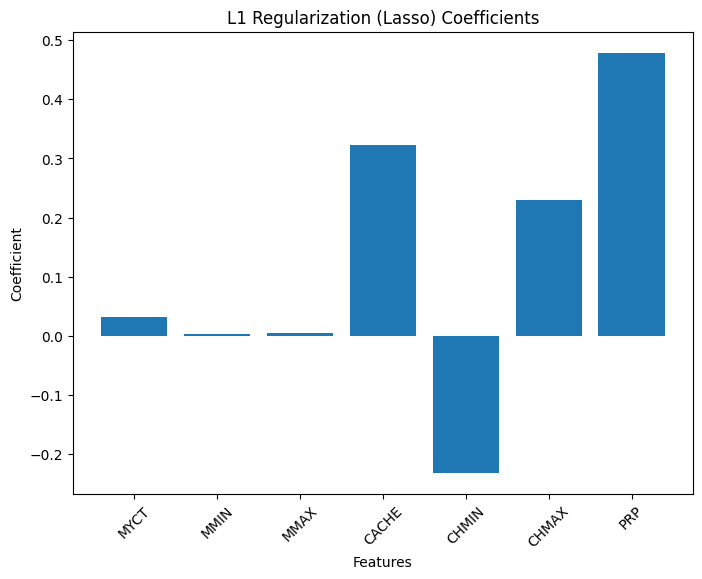

In [ ]:
import matplotlib.pyplot as plt

# After obtaining lasso_coef and ridge_coef

# Plot the L1 regularization coefficients (lasso)
plt.figure(figsize=(8, 6))
plt.bar(feature_list, lasso_coef)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('L1 Regularization (Lasso) Coefficients')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Preparing Training and Testing Data, In the ratio of 80:20

#X_feature = data2[feature_list]
#Y_label = data2.ERP

X_train,X_test,Y_train,Y_test = train_test_split(X_feature,Y_feature_ERP,test_size=0.2,random_state=42,shuffle=True)

X1_train,X1_test,Y1_train,Y1_test = train_test_split(X_feature_PRP,Y_feature_ERP,test_size=0.2,random_state=42,shuffle=True)

print('X_train :', X1_train.shape)
print('X_test  :', X1_test.shape)
print('Y_train :', Y1_train.shape)
print('Y_test  :', Y1_test.shape)

X_train : (167, 1)
X_test  : (42, 1)
Y_train : (167, 1)
Y_test  : (42, 1)


In [ ]:
#Linear Regression

linear_regression = LinearRegression()
linear_regression.fit(X1_train,Y1_train)

Y1_pred = linear_regression.predict(X1_train) #y=mx+c

Y_pred = linear_regression.predict(X1_test)

linear_reg_r2_score = r2_score(Y1_train,Y1_pred)

#Test Score
test_score1 = linear_regression.score(X1_test,Y1_test)

print("R2 score for linear regression train set: ",linear_reg_r2_score)
print("Test set score:",test_score1)

R2 score for linear regression train set:  0.9131406378455326
Test set score: 0.9497950892189664


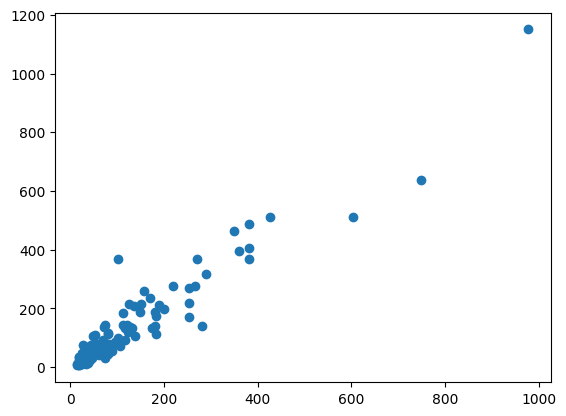

In [ ]:
#original data plot
plt.scatter(X1_train,Y1_train)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_feature,Y_label, test_size=0.2, random_state=42)

# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.9440465034138787


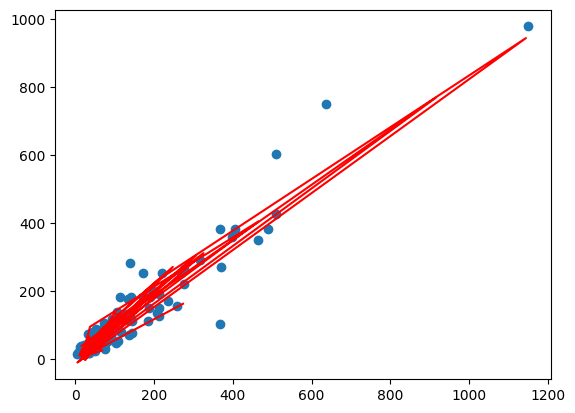

In [ ]:
plt.scatter(X1_train,Y1_train)
plt.plot(X1_test,y_pred,c="red")

In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred, squared=True)

3007.8898321639304

In [ ]:
mean_squared_error(y_test,y_pred, squared=False)

54.844232442107625

In [ ]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

25.515717586190334

In [ ]:
#Chi Square Test

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import scipy.stats as stats

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_feature,Y_label,test_size =  0.25,random_state = 0)

chi2score = chi2(x_train,y_train)

chi2_select = SelectKBest(chi2,k=2)
X_kbest = chi2_select.fit_transform(x_train,y_train)
print(x_train.shape)
print(X_kbest.shape)

(156, 7)
(156, 2)


In [ ]:
# Random Forest Regressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X1_train,Y1_train)

#Make predictions
Y_pred = forest_reg.predict(X1_train)
Y2_pred = forest_reg.predict(X1_test)

# Reshape the target variable to a 1-dimensional array
Y_train = Y_train.ravel()
#Calculating r2 score
forest_r2_score = r2_score(Y1_train,Y_pred)

#Testing score
test_score2 = forest_reg.score(X1_test, Y1_test)

print("R2 score for linear regression train set:",forest_r2_score)
print("Test set score:",test_score2)

R2 score for linear regression train set: 0.9652168356914723
Test set score: 0.9043634139299149


In [ ]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5 , p=2 , metric = 'minkowski')
classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_train)

#Calculating r2 score
KNN_r2_score = r2_score(Y_train,Y_pred)

#Testing score
test_score3 = classifier.score(X_test, Y_test)

print("R2 score for linear regression train set: %.2f",KNN_r2_score)
print("Test set score:",test_score3)

R2 score for linear regression train set: %.2f 0.9652168356914723
Test set score: 0.11904761904761904


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Calculate precision
precision = precision_score(Y_test, y_pred, average='weighted',zero_division=1)

# Calculate recall
recall = recall_score(Y_test, y_pred, average='weighted',zero_division=1)

# Calculate F1-score
f1 = f1_score(Y_test, y_pred, average='weighted',zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.07142857142857142
Precision: 0.6190476190476191
Recall: 0.07142857142857142
F1-score: 0.07142857142857142


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X1_train,Y1_train)

y_pred = dtc.predict(X1_train)

#Calculating r2 score
decisionTree_r2_score = r2_score(Y1_train,y_pred)

#Testing score
test_score4 = dtc.score(X1_test, Y1_test)

print("R2 score for linear regression train set: %.2f",decisionTree_r2_score)
print("Test set score:",test_score4)

R2 score for linear regression train set: %.2f 0.9785911540283442
Test set score: 0.047619047619047616


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred = dtc.predict(X1_test)

# Calculate accuracy
accuracy = accuracy_score(Y1_test, y_pred)

# Calculate precision
precision = precision_score(Y1_test, y_pred, average='weighted',zero_division=1)

# Calculate recall
recall = recall_score(Y1_test, y_pred, average='weighted',zero_division=1)

# Calculate F1-score
f1 = f1_score(Y1_test, y_pred, average='weighted',zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.047619047619047616
Precision: 0.8134920634920635
Recall: 0.047619047619047616
F1-score: 0.03492063492063492


In [ ]:
# Anova
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

anova_filter = SelectKBest(f_classif, k=3)
clf = LinearSVC()
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('selectkbest', SelectKBest(k=3)), ('linearsvc', LinearSVC())])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred = anova_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Calculate precision
precision = precision_score(Y_test, y_pred, average='weighted',zero_division=1)

# Calculate recall
recall = recall_score(Y_test, y_pred, average='weighted',zero_division=1)

# Calculate F1-score
f1 = f1_score(Y_test, y_pred, average='weighted',zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.023809523809523808
Precision: 0.9821428571428571
Recall: 0.023809523809523808
F1-score: 0.009523809523809525


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X1_train,Y1_train)
GaussianNB(priors=None, var_smoothing=1e-09)

y_pred = gnb.predict(X1_test)

accuracy = accuracy_score(Y1_test, y_pred)

# Calculate precision
precision = precision_score(Y1_test, y_pred, average='weighted',zero_division=1)
# Calculate recall
recall = recall_score(Y1_test, y_pred, average='weighted',zero_division=1)
# Calculate F1-score
f1 = f1_score(Y1_test, y_pred, average='weighted',zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.047619047619047616
Precision: 0.9015873015873016
Recall: 0.047619047619047616
F1-score: 0.026984126984126982
